را توضیح دهید sgd پنالتی ترم های  

penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’. No penalty is added when set to None.

 با ریدج و در جه آزادی 0.9 را امتحان کنید sgd مدل classpriceروی داده های   

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df=pd.read_csv('classprice.csv')
df.head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    int64  
 12  peak-rpm           159 non-null    int64  
 13  city-mpg           159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  class              159 non-null    int64  
dtypes: float64(7), int64(9)
me

In [20]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


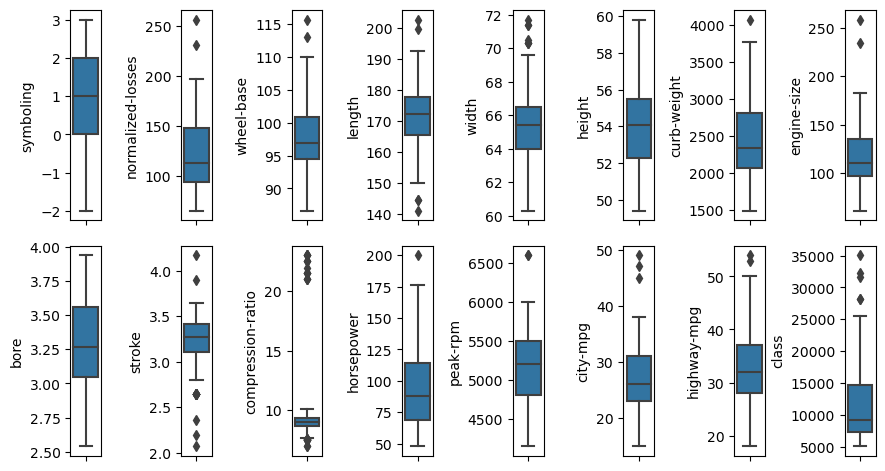

In [34]:
plt.figure(figsize=(9,5 ))
no=0
for col in df.columns:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    sns.boxplot(y=df[col])  

In [ ]:
plt.figure(figsize=(12, 5))
sns.pairplot(df)

In [ ]:
corr_date = df.corr()
fig = plt.figure(figsize =(11, 4)) 
# figsize=(11,1)
ax=sns.heatmap(corr_date, annot=True)
plt.xticks()
plt.show()

### Drop outliers

In [4]:
df=df[(np.abs(stats.zscore(df)) <2).all(axis=1)]

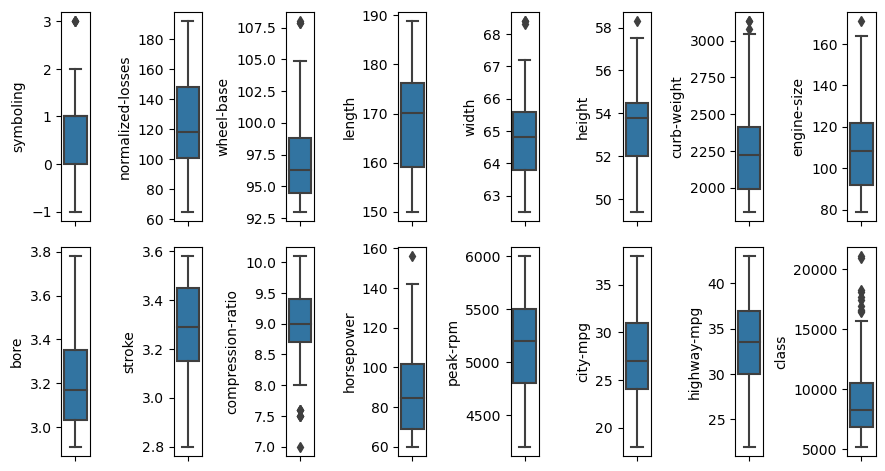

In [41]:
plt.figure(figsize=(9,5 ))
no=0
for col in df.columns:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    sns.boxplot(y=df[col])  

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import math

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85, )

In [7]:
sgr_model = make_pipeline(preprocessing.StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3,penalty='l2'))
sgr_model.fit(X_train, y_train)
print("SGD intercept: ", sgr_model[1].intercept_)
print("SGD coef : ", sgr_model[1].coef_)
print("iteration: ", sgr_model[1].n_iter_)

SGD intercept:  [9244.65945499]
SGD coef :  [-459.80477944  660.75944524  905.99746588 -146.93307565 -767.0171038
  242.9014891   549.04732166  832.92443346  -75.32686017 -611.55287672
  471.98801813  957.30053113   48.03859687 -478.56984343 -363.82660411]
iteration:  62


In [8]:
y_predict= sgr_model.predict(X_test)

In [9]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()

R2:  0.8363820595704315
MSE:  2893389.815500181
MAE :  1227.1860772911627
MAPE :  0.11683333446624072


0.17940406212288962

In [60]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()

R2:  0.8299097936538993
MSE:  3007844.1854606974
MAPE :  1227.809634535891
MAPE :  0.11743124647410606


0.18291800894563293

حال مدل قبلی را در همان هتگامی که بهترین اکسترمم را پیدا کرد نگه دارید و نتیجه را مقایسه کنید


در حالتی  که از تمام ظرفیت پردازشیه سیستم استفاده میکنید بدون اسکیل کردن روی داده ها امتحان کنید  LinearRegression حال مدل

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85, )

In [ ]:
sgr_model = SGDRegressor(max_iter=1000, tol=1e-3,penalty='l2')
sgr_model.fit(X_train, y_train)
y_predict= sgr_model.predict(X_test)

In [13]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
# math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()

R2:  -4.895944976090749e+25
MSE:  8.65789979624401e+32
MAE :  2.8744550433000508e+16
MAPE :  3473579959411.7437


In [15]:
lr_model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())

lr_model.fit(X_train, y_train)
y_predict= lr_model.predict(X_test)

In [17]:
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["class"].mean()


R2:  0.8111057723106161
MSE:  3340371.069140203
MAE :  1206.3467616819062
MAPE :  0.1127592709045813


0.1927640999433744

حال مدل بالا را با استادارد اسکل در پایپ لاین امتحان کنید از مقایسه دو نتیجه با هم چه چیزی میفهمید علت را در بیس کد پیدا کنید

In [ ]:
باتوجه به هم مقیاس نبودن داده ها فیچرهایی که اعداد بالاتری دارند تاثیر زیادی بر روی مدل دارند

روی داده های تایتانیک اعمال کنید امتحان کنید  LinearRegression حال مدل

In [4]:
df=pd.read_csv('titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
df2=df.iloc[:,[1,2,4,5,6,7,9]]

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


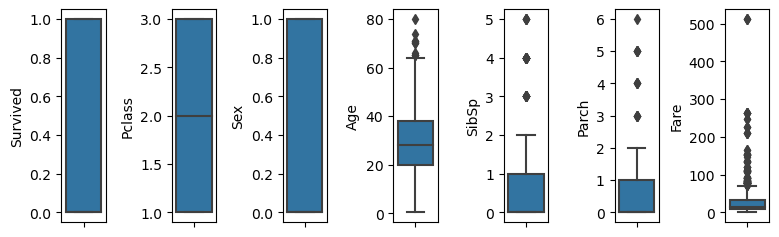

In [65]:
plt.figure(figsize=(9,5 ))
no=0
for col in df2.columns:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    sns.boxplot(y=df2[col])  

In [7]:
df2.dropna(inplace=True)
df2=df2[(np.abs(stats.zscore(df2)) <3).all(axis=1)]
df2

/tmp/ipykernel_1265/573534759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
884,0,3,0,25.0,0,0,7.0500
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [8]:
X = df2.iloc[:, 1:7].values
y = df2.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85, )


array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [44]:
lr_model = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(penalty='l2'))

lr_model.fit(X_train, y_train)
y_predict= lr_model.predict(X_test)

In [55]:
print('accuracy_score:    ',accuracy_score(y_test, y_predict))
print('confusion_matrix:   ', confusion_matrix(y_test, y_predict))
print('classification_report:   ', classification_report(y_test, y_predict))

accuracy_score:     0.7651515151515151
confusion_matrix:    [[64 10]
 [21 37]]
classification_report:                  precision    recall  f1-score   support

           0       0.75      0.86      0.81        74
           1       0.79      0.64      0.70        58

    accuracy                           0.77       132
   macro avg       0.77      0.75      0.75       132
weighted avg       0.77      0.77      0.76       132



In [56]:
df3=pd.concat(
    [pd.DataFrame(X_test),pd.Series(y_predict),pd.Series(y_test )],
    axis=1)
    # join="outer",
    # ignore_index=False,
    # keys=None,
    # levels=None,
    # names=None,
    # verify_integrity=False,
    # copy=True,

In [57]:
df3

,0,1,2,3,4,5,0,1
0,3.0,1.0,20.0,0.0,0.0,8.6625,1,0
1,1.0,1.0,24.0,0.0,0.0,83.1583,1,1
2,3.0,0.0,34.0,0.0,0.0,8.0500,0,0
3,2.0,0.0,21.0,1.0,0.0,11.5000,0,0
4,3.0,0.0,20.0,0.0,0.0,7.2292,0,1
...,...,...,...,...,...,...,...,...
127,1.0,0.0,22.0,0.0,0.0,135.6333,1,0
128,1.0,0.0,36.0,0.0,0.0,40.1250,0,0
129,1.0,1.0,39.0,1.0,0.0,55.9000,1,1
130,3.0,0.0,32.0,1.0,0.0,15.8500,0,0


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score